In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score


🌙 CREANDO DATASET MOONS CON 300 MUESTRAS
📊 Forma del dataset: (300, 3)
🎯 Clusters reales: 2
📈 Distribución de clusters reales:
True_Cluster
0    150
1    150
Name: count, dtype: int64


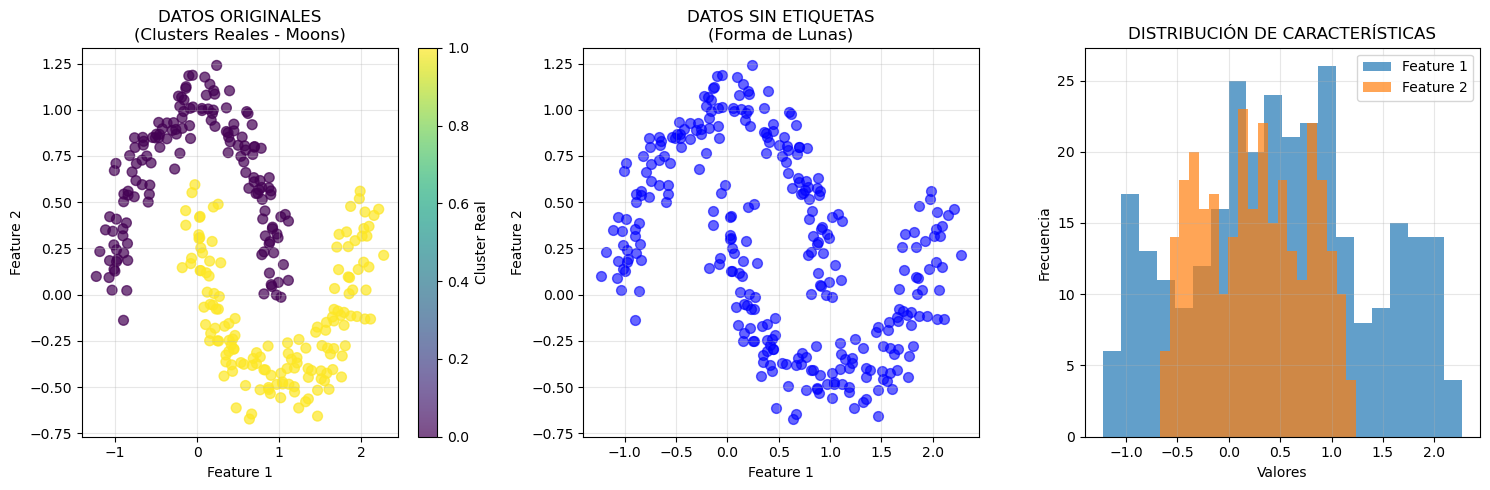

In [2]:
print("🌙 CREANDO DATASET MOONS CON 300 MUESTRAS")
print("="*50)

# Crear dataset moons con 300 muestras y algo de ruido
X, y_true = make_moons(n_samples=300, 
                       noise=0.1, 
                       random_state=42)

# Crear DataFrame
moons_df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
moons_df['True_Cluster'] = y_true

print(f"📊 Forma del dataset: {moons_df.shape}")
print(f"🎯 Clusters reales: {len(np.unique(y_true))}")
print(f"📈 Distribución de clusters reales:")
print(moons_df['True_Cluster'].value_counts().sort_index())

# =============================================================================
# VISUALIZACIÓN INICIAL (ANTES DEL CLUSTERING)
# =============================================================================

plt.figure(figsize=(15, 5))

# Gráfica 1: Datos originales con clusters reales
plt.subplot(1, 3, 1)
scatter = plt.scatter(moons_df['Feature_1'], moons_df['Feature_2'], 
                     c=moons_df['True_Cluster'], cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter, label='Cluster Real')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DATOS ORIGINALES\n(Clusters Reales - Moons)')
plt.grid(True, alpha=0.3)

# Gráfica 2: Datos sin etiquetas (como los vería el algoritmo)
plt.subplot(1, 3, 2)
plt.scatter(moons_df['Feature_1'], moons_df['Feature_2'], 
           alpha=0.6, color='blue', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DATOS SIN ETIQUETAS\n(Forma de Lunas)')
plt.grid(True, alpha=0.3)

# Gráfica 3: Distribución de características
plt.subplot(1, 3, 3)
plt.hist(moons_df['Feature_1'], alpha=0.7, label='Feature 1', bins=20)
plt.hist(moons_df['Feature_2'], alpha=0.7, label='Feature 2', bins=20)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('DISTRIBUCIÓN DE CARACTERÍSTICAS')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



🌳 ANÁLISIS DEL DENDROGRAMA - DATASET MOONS


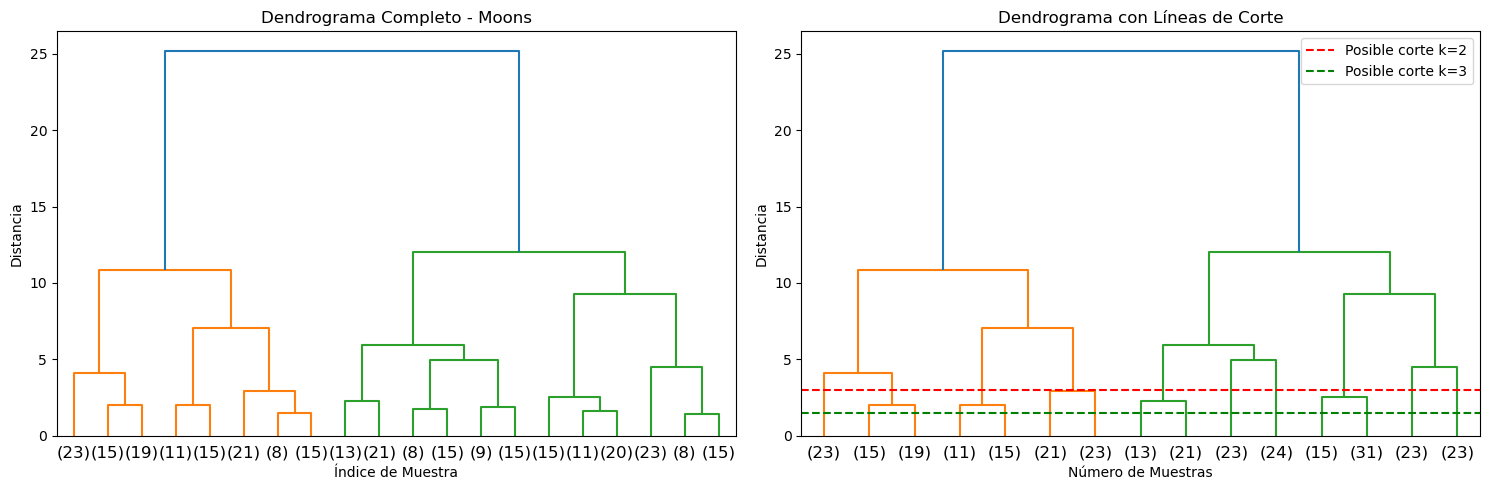

In [3]:
print("\n" + "="*60)
print("🌳 ANÁLISIS DEL DENDROGRAMA - DATASET MOONS")
print("="*60)

# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear dendrograma
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
Z = linkage(X_scaled, method='ward')
dendrogram(Z, orientation='top', truncate_mode='lastp', p=20)
plt.title('Dendrograma Completo - Moons')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')

plt.subplot(1, 2, 2)
dendrogram(Z, orientation='top', truncate_mode='lastp', p=15)
plt.axhline(y=3, color='r', linestyle='--', label='Posible corte k=2')
plt.axhline(y=1.5, color='g', linestyle='--', label='Posible corte k=3')
plt.title('Dendrograma con Líneas de Corte')
plt.xlabel('Número de Muestras')
plt.ylabel('Distancia')
plt.legend()

plt.tight_layout()
plt.show()



🔬 EXPERIMENTO 1: Agglomerative Clustering con k=2


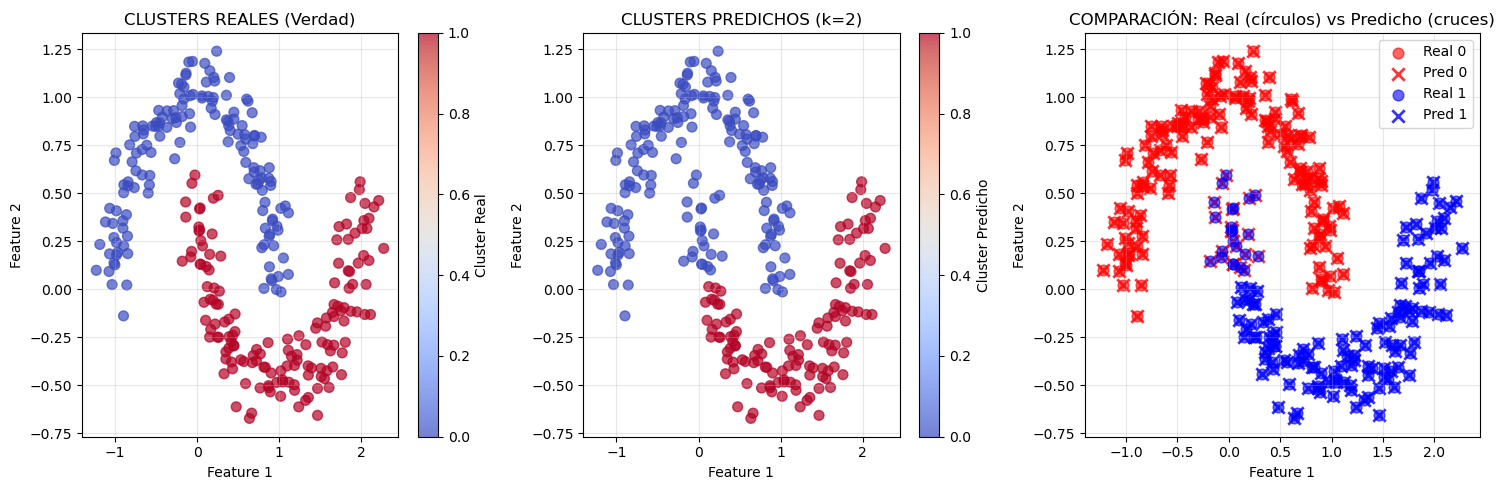

📊 MÉTRICAS para k=2:
   Silhouette Score: 0.4485
   Calinski-Harabasz Score: 335.1332
   Adjusted Rand Index: 0.7159


In [4]:
print("\n" + "="*60)
print("🔬 EXPERIMENTO 1: Agglomerative Clustering con k=2")
print("="*60)

# Aplicar Agglomerative Clustering con 2 clusters (sabemos la verdad)
agg_model_2 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_pred_2 = agg_model_2.fit_predict(X_scaled)

# Visualización comparativa
plt.figure(figsize=(15, 5))

# Gráfica 1: Clusters reales
plt.subplot(1, 3, 1)
scatter1 = plt.scatter(moons_df['Feature_1'], moons_df['Feature_2'], 
                      c=moons_df['True_Cluster'], cmap='coolwarm', alpha=0.7, s=50)
plt.colorbar(scatter1, label='Cluster Real')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('CLUSTERS REALES (Verdad)')
plt.grid(True, alpha=0.3)

# Gráfica 2: Clusters predichos
plt.subplot(1, 3, 2)
scatter2 = plt.scatter(moons_df['Feature_1'], moons_df['Feature_2'], 
                      c=y_pred_2, cmap='coolwarm', alpha=0.7, s=50)
plt.colorbar(scatter2, label='Cluster Predicho')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('CLUSTERS PREDICHOS (k=2)')
plt.grid(True, alpha=0.3)

# Gráfica 3: Comparación lado a lado
plt.subplot(1, 3, 3)
colors = ['red', 'blue']
for i in range(2):
    # Clusters reales (círculos)
    real_data = moons_df[moons_df['True_Cluster'] == i]
    plt.scatter(real_data['Feature_1'], real_data['Feature_2'], 
               c=colors[i], label=f'Real {i}', alpha=0.6, marker='o', s=60)
    
    # Clusters predichos (cruces)
    pred_data = moons_df[y_pred_2 == i]
    plt.scatter(pred_data['Feature_1'], pred_data['Feature_2'], 
               c=colors[i], label=f'Pred {i}', alpha=0.8, marker='x', s=80, linewidth=2)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('COMPARACIÓN: Real (círculos) vs Predicho (cruces)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Métricas para k=2
silhouette_2 = silhouette_score(X_scaled, y_pred_2)
calinski_2 = calinski_harabasz_score(X_scaled, y_pred_2)
ari_2 = adjusted_rand_score(y_true, y_pred_2)  # Adjusted Rand Index

print(f"📊 MÉTRICAS para k=2:")
print(f"   Silhouette Score: {silhouette_2:.4f}")
print(f"   Calinski-Harabasz Score: {calinski_2:.4f}")
print(f"   Adjusted Rand Index: {ari_2:.4f}")



🔬 EXPERIMENTO 2: Búsqueda del K óptimo en Moons


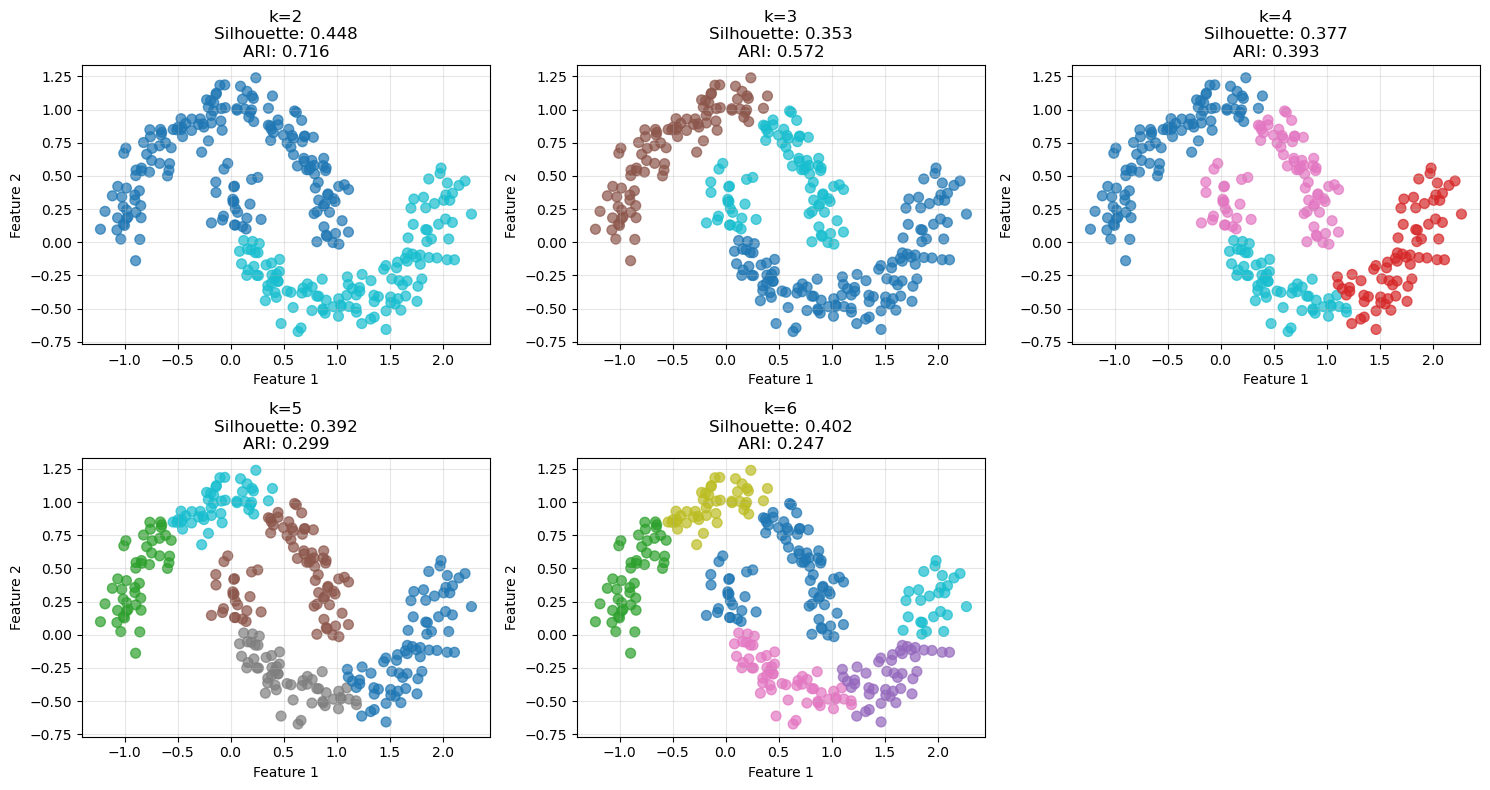

🎯 MEJOR K SEGÚN SILHOUETTE: 2 (score: 0.4485)
🎯 MEJOR K SEGÚN CALINSKI: 6 (score: 361.1744)
🎯 MEJOR K SEGÚN ARI: 2 (score: 0.7159)


<Figure size 640x480 with 0 Axes>

In [8]:
print("\n" + "="*60)
print("🔬 EXPERIMENTO 2: Búsqueda del K óptimo en Moons")
print("="*60)

# Probar diferentes valores de k
k_range = range(2, 7)
silhouette_scores = []
calinski_scores = []
ari_scores = []

plt.figure(figsize=(15, 8))

for i, k in enumerate(k_range):
    # Aplicar clustering
    agg_model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    y_pred = agg_model.fit_predict(X_scaled)
    
    # Calcular métricas
    silhouette = silhouette_score(X_scaled, y_pred)
    calinski = calinski_harabasz_score(X_scaled, y_pred)
    ari = adjusted_rand_score(y_true, y_pred)
    
    silhouette_scores.append(silhouette)
    calinski_scores.append(calinski)
    ari_scores.append(ari)
    
    # Gráfica de resultados
    plt.subplot(2, 3, i+1)
    scatter = plt.scatter(moons_df['Feature_1'], moons_df['Feature_2'], 
                         c=y_pred, cmap='tab10', alpha=0.7, s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'k={k}\nSilhouette: {silhouette:.3f}\nARI: {ari:.3f}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Encontrar mejor k
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
best_k_calinski = k_range[np.argmax(calinski_scores)]
best_k_ari = k_range[np.argmax(ari_scores)]

print(f"🎯 MEJOR K SEGÚN SILHOUETTE: {best_k_silhouette} (score: {max(silhouette_scores):.4f})")
print(f"🎯 MEJOR K SEGÚN CALINSKI: {best_k_calinski} (score: {max(calinski_scores):.4f})")
print(f"🎯 MEJOR K SEGÚN ARI: {best_k_ari} (score: {max(ari_scores):.4f})")



plt.tight_layout()
plt.show()